# **Don't panic!** A gentle introduction to PyTorch 🔥

**Author**: Mikel Malagón <mikel.malagon@ehu.eus>

This is an introductory notebook to get up and running with [PyTorch](https://pytorch.org/), one of the most popular deep learning libraries. The aim of this notebook is to introduce the most basic and commonly used aspects of PyTorch to start developing your projects using this library as fast as possible. The notebook assumes basic knowledge on python, machine learning, and that PyTorch is installed, for installation instructions visit the "install pytorch" section of its [main page](https://pytorch.org/).

⚠️ In case you are running this notebook on Google Colab, I highly recommend enabling GPU in: Runtime > Select runtime type > Hardware accelerator > GPU.

<br>

**NOTE:** In case you found some bug or have any question/suggestion, don't hesitate to send a mail to the address above.

**NOTE:** This notebook is released under the [GPLv3](https://www.gnu.org/licenses/gpl-3.0.en.html) free software license.

## Set up

First things first, let's import PyTorch to our environment together with matplotlib and numpy.

In [36]:
import torch

import matplotlib.pyplot as plt
import numpy as np

The following line just checks if there is some GPU available and sets the `device` variable accordingly.

In [37]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda:0


## Introducing the basic element: *the tensor* 🔥💦🌬🗻

Tensors are the central object in pytorch. They can have a single dimension (vector), 2 dimensions (matrix), or n-dimensions (tensor). They also share a very similar interface to `ndarray`s of the popular `numpy` library. In PyTorch, tensors are represented with the [`Tensor`](https://pytorch.org/docs/stable/tensors.html) object.

Let's create our first pytorch tensors with some default values:

In [38]:
my_tensor = torch.Tensor([0., 1., 2.]) # Note that 2.0 can be written as 2. in Pyhton
my_tensor

tensor([0., 1., 2.])

Now that we have created a tensor, let's explore the "must know" attributes or properties that all pytorch tensors have:

In [39]:
print("The size of the tensor is:", my_tensor.size())

print("The type of the tensor is:", my_tensor.dtype)

print("Where is the tensor? ", my_tensor.device)

print("Has the gradient property? ", my_tensor.requires_grad)

The size of the tensor is: torch.Size([3])
The type of the tensor is: torch.float32
Where is the tensor?  cpu
Has the gradient property?  False


Note that pytorch tensors have the folowing default properties:
- The tensor is stored in CPU memory.
- By default numbers are stored as 32 bit float.

PyTorch tensors have a very similar interface to numpy's `ndarray`, let's see how to do some basic math operations with tensors:

In [40]:
double = 2 * my_tensor # multiply a tensor by an scalar
half = my_tensor / 2
triple = double + my_tensor # operations between tensors

print("Half:", half)
print("Double:", double)
print("Triple:", triple)

Half: tensor([0.0000, 0.5000, 1.0000])
Double: tensor([0., 2., 4.])
Triple: tensor([0., 3., 6.])


Pretty easy! right? As you can see, pytorch tensors can be manipulated using standard python operators, leading to cleaner code. But these operations can also be done directly using pytorch library functions ([reference](https://pytorch.org/docs/stable/torch.html)):

In [41]:
# repeat the same operations from the code block above but using pytorch functions
double = torch.mul(2., my_tensor)
half = torch.div(my_tensor, 2.)
triple = torch.sum(double + my_tensor)  # torch.add(double, my_tensor)?

print("Half:", half)
print("Double:", double)
print("Triple:", triple)

Half: tensor([0.0000, 0.5000, 1.0000])
Double: tensor([0., 2., 4.])
Triple: tensor(9.)


In the examples above, we have used a tensor created with some default values, but pytorch offers a wide variety of handy constructors to create our tensors. These are some of the most used ones, but the complete list of constructors can be found [here](https://pytorch.org/docs/stable/torch.html#creation-ops).  

In [42]:
# Create a tensor of 3x3 dimension with all values set to zero
z = torch.zeros(3, 3)
print("--> torch.zeros:\n\n", z)

# A tensor whose values are sampled from a uniform distribution on the [0, 1) range
u = torch.rand((3, 3)) # the shape of the tensor goes between parenthesis here
print("\n--> torch.rand:\n\n", u)

# A tensor whose values are sampled from a (0, 1) normal
n = torch.randn((3, 3))
print("\n--> torch.randn:\n\n", n)

# Returns a 2-D tensor with ones on the diagonal and zeros elsewhere
i = torch.eye(3, 3)
print("\n--> torch.eye:\n\n", i)

# Returns a 2-D tensor with ones on the diagonal and zeros elsewhere
o = torch.ones(3, 3)
print("\n--> torch.ones:\n\n", o)

--> torch.zeros:

 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

--> torch.rand:

 tensor([[0.8715, 0.0883, 0.2584],
        [0.3612, 0.1993, 0.1960],
        [0.8456, 0.9215, 0.2259]])

--> torch.randn:

 tensor([[-1.1568, -0.8260, -1.3750],
        [ 0.6145,  0.0701,  0.1743],
        [ 1.6589, -0.1883,  0.2057]])

--> torch.eye:

 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

--> torch.ones:

 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


## Where the witchcraft starts 🧙‍♂️: ✨Autograd✨

Remember the code cell in wich we saw the properties of pytorch tensors, the `requires_grad` property of the tensor was set to `False`. This property tells pytorch wheter or not to track the gradient of a tensor. In this section we will see how to use pytorch's Autograd to automatically compute the gradient of a tensor.

Let's start by creating a tensor with some default values and setting its `requires_grad` property:

In [43]:
x = torch.tensor(
    [[1., -1.],
     [-1., 1.]],
    requires_grad=True) # track gradients
x

tensor([[ 1., -1.],
        [-1.,  1.]], requires_grad=True)

Note how this time the `requires_grad` attribute is set to `True`, indicating pytorch to track the operations over it to then be able to compute the gradient. So let's test it! Compute the sum of the squares of the tensor `x`:

In [44]:
x1 = x.pow(2)
# print(x1)
out = x1.sum()
out

tensor(4., grad_fn=<SumBackward0>)

This is already a bit of a spoiler, notice that the resulting `out` tensor doesn't only contain the final value of the operation (`4.0`) but it also contains a property `grad_fn` that is set to an object named `SumBackward0`. In fact, when operating on a tensor with the `requires_grad` attribute set to `True`, the tensor resulting from any operation on it will contain a `grad_fn` attribute with the derivative function of the applied operation. This way, pytorch is able to construct a graph of the operations that led to a specific tensor to later perform automatic differentiation.

In this example, we will compute the gradient of the tensor `x` with respect to the result of the operation, the tensor `out`. By calling the method `backward` on the `out` tensor, Autograd will traverse the described graph and will compute the gradients of all tensors that led to the tensor `out`.

In [45]:
out.backward()

To access to the gradients of the tensor `x` we simply have to check its `grad` attribute:

In [46]:
x.grad

tensor([[ 2., -2.],
        [-2.,  2.]])

Voilà! Just using 4 lines of code we used Autograd, the automatic differentiation engine of pytorch, to compute automatically the gradients of a tensor<h1>💃🕺</h1>

- 📖 More information on Autograd and how to use it can be found [here](https://pytorch.org/docs/stable/notes/autograd.html).

TODO (Jon): For those used to TF, it is more natural to use [torch.autograd.grad](https://pytorch.org/docs/stable/generated/torch.autograd.grad.html). I'll include an example comparing that with .backward()

## Linear regression with gradient descent 📈

Now that we have covered the basics of tensors and autograd, we can get into the first proper exercise: linear regression using gradient descent!!!🙌🥳🤓 Not super impressive, but the concepts built in this example perfectly translate to more complex use cases.

<br>
Let's start by creating some data for the sake of the exercise. Note that the contents of this function aren't very relevant right now, but trying to understand it in depth can be a nice exercise for later (once you have become a pytorch ninja 🥷).

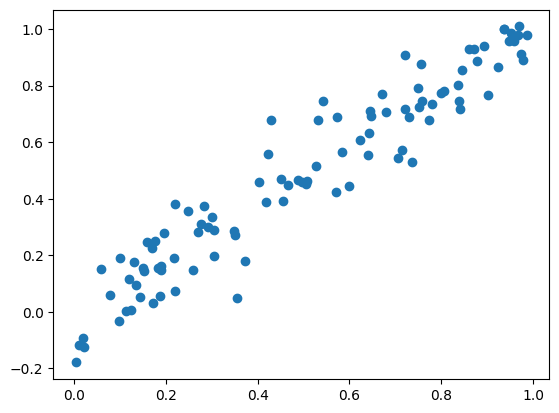

In [47]:
def data_gen(n_samples=10, x_max=1, intercept=0, noise_gain=0.1):
    # uniformly sample the [0, 1) interval
    x = x_max*torch.rand(n_samples)
    # add some Gaussian noise to x
    y = x + noise_gain*torch.randn(n_samples) + intercept
    return x[:, None], y[:, None]

x, y = data_gen(n_samples=100)
plt.scatter(x, y)

Let's create a loss function to measure the error of our regressor. In this case, we'll use the MSE loss, but feel free to change it. Note the similarity of the function to the example used to illustrate Autograd.

In [48]:
def mse_loss(y_hat, y_target):
    return (y_hat - y_target).pow(2.).mean()

The code cell below just initializes a couple of hyperparameters, and helper variables to log the progress of the trainig process.

In [49]:
# learning rate
lr = 0.1

# maximum number of iterations
iters = 100

# used to log loss values for visualization purposes
loss_values = []
param_values = []

In this case, as the data is 2 dimensional the regressor will have two values: corresponding to the slope and intercept. This parameters will be stored in a single `Tensor` object initialized to random values:

In [50]:
# intialize the parameters of the model
model = torch.randn(2, requires_grad=True)
model

tensor([-0.9504, -0.7520], requires_grad=True)

This code block is where all the fun happens: *the training loop*.

Step by step the training loop goes as the following:

1. Given $x$, use the model to compute the estimate $\hat{y}$.
2. Compute the loss value based on the actual $y$ and the estimate $\hat{y}$.
3. Call `.backward()` on the loss value, this way autograd will fill the gradients of the tensors that produced $\hat{y}$.
4. Update the parameters of the model using gradient descent.
5. Reset the gradients of the tensors to zero before the next iteration.

In [51]:
for it in range(iters):

    # 👁️ (1) compute the estimated y values using our model
    y_hat = x * model[0] + model[1]

    # 👁️ (2) compute the error
    loss = mse_loss(y_hat, y)

    # just for logging
    loss_values.append(loss.item())
    param_values.append(model.detach().tolist())
    if it % 10 == 0:
        print(f"{it+1}/{    iters} MSE: {loss.item()}")

    # 👁️ (3) use autograd to compute gradients w.r.t the loss
    loss.backward()

    with torch.no_grad(): # within this block, autograd is disabled
        # 👁️ (4) update the parameters of the model
        # note that we don't want autograd to track this operation
        model -= lr*model.grad

    # 👁️ (5) set gradients to zero for the next iteration,
    # otherwise gradients accumulate
    model.grad.data.zero_()

1/100 MSE: 3.28828763961792
11/100 MSE: 0.12310733646154404
21/100 MSE: 0.08804365247488022
31/100 MSE: 0.06839004158973694
41/100 MSE: 0.05363260582089424
51/100 MSE: 0.042537230998277664
61/100 MSE: 0.03419513255357742
71/100 MSE: 0.027923090383410454
81/100 MSE: 0.02320743352174759
91/100 MSE: 0.019661951810121536


Plot the data logged during the training process:

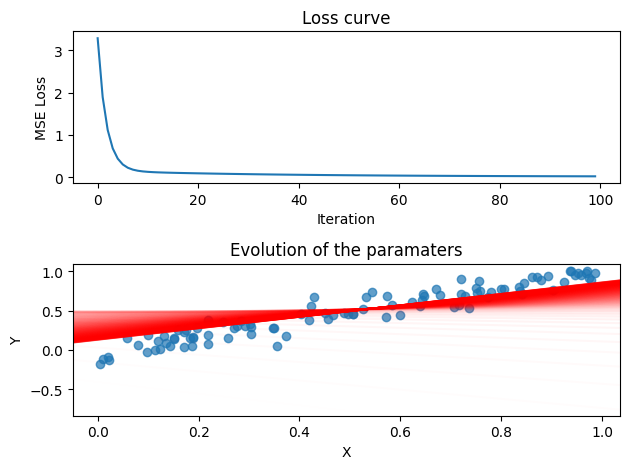

In [52]:
# This is just an utility function, its content isn't relevant for the moment
def viz_linear_reg(loss_values, param_values):
    plt.subplot(2, 1, 1)
    plt.plot(loss_values)
    plt.title("Loss curve")
    plt.ylabel("MSE Loss")
    plt.xlabel("Iteration")

    plt.subplot(2, 1, 2)
    plt.scatter(x, y, alpha=0.7)

    for i, param in enumerate(param_values):
        plt.axline((0, param[1]), slope=param[0],
            color=[1., 0., 0., 0.5*i/len(param_values)])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Evolution of the paramaters")
    plt.tight_layout()

viz_linear_reg(loss_values, param_values)

## A little bit more sophisticated example 🧞

Despite the simplicity of the following example, we used quite "low level" constructs to conduct it. Normally, one doesn't directly define the parameters of the model as tensors, and doesn't perform gradient descent by hand.

In this exercise, we'll apply the same concepts but in a higher level of abstraction, using the ergonomic functionalities that PyTorch offers.

<br>

First, let's initialize the same model but using PyTorch's [`nn`](https://pytorch.org/docs/stable/nn.html) module:

In [53]:
import torch.nn as nn

model = nn.Linear(1, 1)

model

Linear(in_features=1, out_features=1, bias=True)

Inspecting the `Linear` object (more info [here](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#linear)), we can see that it holds the same slope and intercept values as in the later exercise.

In [ ]:
model.weight

Parameter containing:
tensor([[0.4940]], requires_grad=True)

In [54]:
model.bias

Parameter containing:
tensor([0.4506], requires_grad=True)

As primised, this time we won't perform gradient descent by hand, instead we'll employ the `SGD` optimizer from the PyTorch's [`optim`](https://pytorch.org/docs/stable/optim.html) module.

Note that `SGD` is given the parameters of the model and the learning rate (optional) in the initialization. For the complete list of arguments and more info visit the [docs](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html?highlight=sgd#torch.optim.SGD).  

In [55]:
from torch.optim import SGD

optimizer = SGD(model.parameters(), lr=lr)

The code cell below presents the modified training loop from the later exercise, in this case using PyTorch's `Linear` and `SGD` objects.
Note that the loop continues to have the same five steps, however, in this case the optimization (step 4) is handled by PyTorch. Although basic SGD can be quite simple to implement by hand, it's handy to have more exotic (e.g. AdamW or RMSprop) optimizers efficiently implemented (although it's a fun exercise to do so).

In [ ]:
loss_values = []
param_values = []

for it in range(100):
    # 👁️ (1) compute the estimated y values using our model
    y_hat = model(x)

    # 👁️ (2) compute the error
    loss = mse_loss(y_hat, y)


    # ---- just for logging ---- #

    loss_values.append(loss.item())
    param_values.append([model.weight[0][0].item(),
                         model.bias[0].item()])
    if it % 10 == 0:
        print(f"{it+1}/{iters} MSE: {loss.item()}")

    # -------------------------- #


    # 👁️ (3) tell autograd to compute gradients w.r.t the loss
    loss.backward()

    # 👁️ (4) update the parameters of the model
    optimizer.step()

    # 👁️ (5) clear previous gradient values
    optimizer.zero_grad()

1/100 MSE: 0.2688156068325043
11/100 MSE: 0.01625615917146206
21/100 MSE: 0.01455574482679367
31/100 MSE: 0.013754534535109997
41/100 MSE: 0.013131619431078434
51/100 MSE: 0.01264622900635004
61/100 MSE: 0.012268003076314926
71/100 MSE: 0.011973278596997261
81/100 MSE: 0.011743620969355106
91/100 MSE: 0.011564667336642742


Visualize the training process:

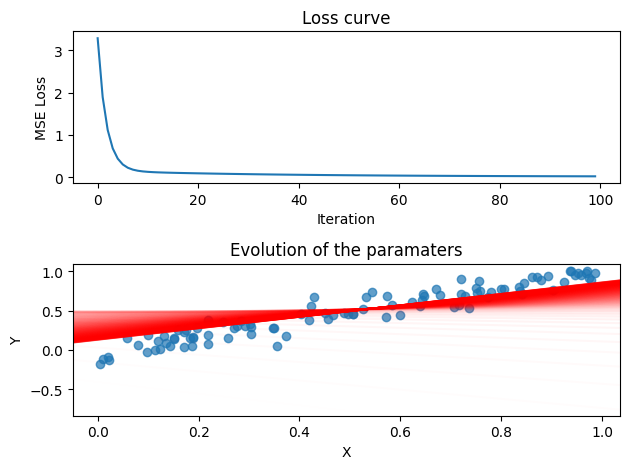

In [56]:
viz_linear_reg(loss_values, param_values)

## We are ready for the neurons 🧠  

Up until this point we have seen the basics of tensors, their operations and properties, optimizers, and used autograd for linear regression. In this section, we'll use all this knowledge to train a neural network to classify MNIST digits!! 🔢 (I know... not super exciting, but a good stepping stone towards becoming a Pytorch ninja).

Although this example might sound trivial, the described training process follows the same logic and concepts as many real-life use cases.  

### Loading and preparing the data 📥

The first step is to import `torchvision`, PyTorch's module for computer vision.

In [57]:
import torchvision
import torchvision.transforms as transforms

The following function is just an  utility function, and it's contents aren't very relevant for the objectives of the exercise. You can try to understand what the function does in depth later as an extra exercise.

In [58]:
# utility function
def show_batch(batch):
    batch = batch.view(-1, 1, 28, 28) # de-flatten
    img = torchvision.utils.make_grid(batch)
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Let's download and preprocess the MNIST dataset:

In [61]:
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5),
     lambda x: x.flatten(),
    ])

batch_size = 128

# training data
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# test data
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

There's quite a lot going in the code cell above, let's go step by step:

1. Define the transformation to apply to the dataset. Via `transforms.Compose` PyTorch enables to construct a pipeline of functions to preprocess the data before training (more info [here](https://pytorch.org/vision/main/transforms.html)). In this example, the pipeline goes as the following:
 1. Images are first converted to tensors.
 2. Normalize the images, as by default images are defined in the RGB space (values from 0 to 255).
 3. MNIST contains 28x28 pixel images, flatten the images to 784 element vectors, as we'll consider a simple multi-layer perceptron and not a convolutional neural network.  

2. Download the training set of MNIST and store it in a PyToch's `DataSet` object. This is used to download the data, load it to Python, and applying the `transform` defined in the step above. Then, prepare the dataset for training using the `DataLoader` object (more info on DataSet and DataLoaders [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)). The `DataLoader` is used to shuffle the dataset and split it in batches.

3. Same for the test set of the MNIST dataset.

Let's see how can we use the just created `DataLoader`:

images: torch.Size([128, 784]), labels: torch.Size([128])




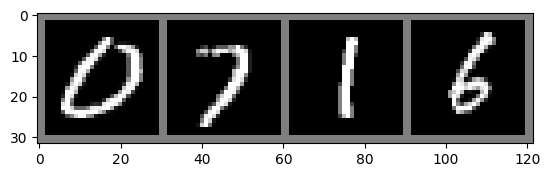

In [66]:
# convert the DataLoader to a python's iterator
trainiter = iter(trainloader)

# get the first element of the iterator (the first batch)
images, labels = next(trainiter)

print(f"images: {images.size()}, labels: {labels.size()}\n\n")

show_batch(images[:4]) # show the first 4 images of the batch

## Defining the model 🥼🧪

Remember that in the previous exercises we have defined our model as a PyTorch `Tensor` and as a `Linear` module. As in this exercise we're going to build a more complex model (a MLP), it's convenint to define it as a PyTorch module (see the  [docs](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)).
PyTorch modules are objects normally used to compose models, where models can be composed by other modules (it's a bit of a matryoshka). In fact, `Linear` is an already defined module (there are many more, check [this](https://pytorch.org/docs/stable/nn.html)) that we can use to build our own one!

In [68]:
class Net(nn.Module): # inherit nn.Module
    def __init__(self):
        super().__init__()

        # define the layers
        self.l1 = nn.Linear(28*28, 512)
        self.l2 = nn.Linear(512, 10)

        # an activation function, feel free to change it
        self.activation = nn.ReLU()

        # as an extra, let's also add drop out (with 0.2 prob.)
        self.d1 = nn.Dropout(0.2)

    # this method will called every forward pass of our model
    def forward(self, x):
        # define the forward pass
        x = self.l1(x)
        x = self.activation(x)
        x = self.d1(x)
        x = self.l2(x)
        return x

Initialize our model:

In [69]:
model = Net().to(device)

Note that `.to(device)` has been used to move the model to the selected device ("cuda:0" or "cpu" in our case).

## The training loop 🔃

As a common practice, we'll use a PyTorch optimizer to optimize our model:

In [70]:
optimizer = optim.Adam(model.parameters())

In this case, for convenience, instead of implementing our own loss function we're going to use an already defined one, the [`CrossEntropyLoss`](https://pytorch.org/docs/2.0/generated/torch.nn.CrossEntropyLoss.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss). PyTorch implements many loss functions, they are available [here](https://pytorch.org/docs/stable/nn.html#loss-functions).

In [71]:
criterion = nn.CrossEntropyLoss()

And finally, here is the main training loop!

In [72]:
from tqdm import tqdm # used for the pretty progress bar

num_epochs = 3

for epoch in range(num_epochs): # for each epoch

    loss_sum = 0 # used to compute the epoch's mean loss

    for images, labels in tqdm(trainloader): # for each batch in the train set

        # use the model to make a prediction
        pred = model(images.to(device))

        # compute the error of the model w.r.t the truth labels
        loss = criterion(pred, labels.to(device))

        loss_sum += loss.item() # used to compute the epoch's mean loss

        # optimization
        loss.backward()       # compute gradients
        optimizer.step()      # run the optimizer
        optimizer.zero_grad() # clear gradients for the next batch

    print(f"\n** {epoch+1}/{num_epochs} mean loss: {loss_sum/len(trainloader)}\n")

100%|██████████| 469/469 [00:16<00:00, 28.41it/s]



** 1/3 mean loss: 0.37620252186555597



100%|██████████| 469/469 [00:12<00:00, 38.69it/s]



** 2/3 mean loss: 0.18268750928866584



100%|██████████| 469/469 [00:12<00:00, 38.56it/s]


** 3/3 mean loss: 0.13747020384300745



## Evaluation 🔍

Once we have our model trained, let's see how it behaves. The following code cell takes the first four images of the test set and uses the model to predict it's labels.

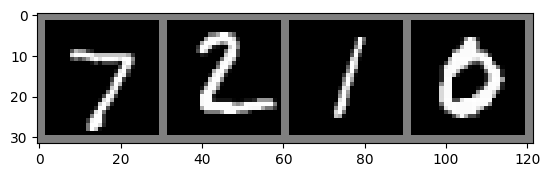


** Predictions: [7, 2, 1, 0]


In [79]:
images, labels = next(iter(testloader)) # get the first batch

# select the first four elements of the batch
images = images[:4]
labels = labels[:4]

# plot the selected images
show_batch(images)

# When evaluating a model it must be set to eval mode, else dropout and other
# regularization modules will still be active and bad things will happen.
# To go bacj to training mode use model.train().
model.eval() # ==> IMPORTANT!

# use the model to make a prediction
preds = model(images.to(device))    # note that the model outputs logits
preds = torch.argmax(preds, dim=-1) # take the labels with greatest prob.
print(f"\n** Predictions:", preds.tolist())

<br>
<br>

And this is all! Congrats for reaching here!!👏🪘🪇 You're one step closer to
become a PyTorch ninja🥷, but that's a journey you will have to follow alone 🎒🏕🏋🏞🗺.

Hope you liked the tutorial and learned something!

Agur!! 👋🤓